# Introduction to Neuroinformatics
## Exercise session 2: Passive membrane potential

Welcome to the first exercise session of the introduction to neuroinformatics course. This exercise session will visualize various membrane potential equations for you to interact with and answer assignments. Later in the notebook, we will move to some theory involving RC circuits.

# Table of contents
* [Packages](#packages)
* [1: Introduction to passive membrane properties](#intro)
    * [1.1: Nernst Equation](#Neq)
    * [1.2: Nernst-Planck Equation](#NPeq)
    * [1.3: Goldman-Hodgkin-Katz (GHK) Equation](#GHK)
* [2: Membrane Capacitance and the RC Circuit](#modelling)
    * [2.1: Series Circuit Analyis](#series)
    * [2.2: Charing and discharging in the series RC circuit](#charging)
    * [2.3: The time constant Tau](#tau)

# Packages <a class="anchor" id="packages"></a>

This notebook was <font color='red'>**designed to be run in colab**</font>. We have included code blocks to allow the possibility of running the notebook locally, but due to the vastness of peoples' setups, we do not support it much further.

If you wish to continue in Colab, click on the "Copy to Drive" button to be able to save your progress.

The following cells are used to install the necessary packages and libraries for the exercise:

In [ ]:
!which python  # This displays which python is being used
!pwd # This displays the current directory

/usr/local/bin/python
/content


In [ ]:
!pip install --quiet scipy PyQt6 ipywidgets wget ipympl # Install necessary packages

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.constants import R, physical_constants
import wget
import os

In [ ]:
# Define the URL and the output directory
output_dir = 'utils_ex1'
url = f'https://github.com/ManteLab/Iton_notebooks_public/raw/refs/heads/main/{output_dir}/utils.py'

if not os.path.exists(output_dir):
    # Create the directory if it doesn't already exist
    os.makedirs(output_dir, exist_ok=True)

    # Download the file into the specified directory
    print(f"Downloading file to '{output_dir}'...")
    filename = wget.download(url, out=output_dir)
    print(f"\nFile successfully downloaded as: {filename}")

Checking the platform:

In [ ]:
platform = 'notebook'
try:
    import google.colab
    from google.colab import output
    platform = 'colab'
    output.enable_custom_widget_manager()
except:
    pass
print(f"platform: {platform}")

platform: colab


In [ ]:
if platform == 'colab':
    %matplotlib widget
    !pip3 install --quiet ipympl
    from google.colab import output
    output.enable_custom_widget_manager()
else:
    %matplotlib inline


In [ ]:
from utils_ex1.utils import nernst_interactive_plot, nernst_planck_interactive_plot, ghk_interactive_plot

# Faraday constant (F) from scipy's physical_constants
F_constant = physical_constants['Faraday constant'][0]

# Define constants
T_default = 310  # Temperature in Kelvin (37°C, human body temperature)
R_constant = R  # Universal gas constant in J/(mol·K)

---

# 1. Introduction to passive membrane properties <a name="intro"></a>
In the previous exercise you became familiar with Jupyter Notebooks. This should help you to navigate this and all upcoming exercises.

This Notebook contains exercises and offers a partial review of concepts covered in the last lecture. Additionally, it introduces new aspects that demonstrate neuronal passive membrane properties, while also explaining the mathematical principles used to model these properties.

You will encouter various **tasks** during the exercise marked with the keyword  **"Assignments"**. Try to solve these assignments to the best of your ability - many of your solutions are essential to understand the next parts of the exercise.

**Solutions** to the exercises will be published the following week.

## 1.1: Nernst Equation - Reversal / equilibrium potential <a name="Neq"></a>
You have already heard that positivly and negatively charged ions and their distribution on both sides of the cell membrane are responsible for some of the biophysical properties of neurons.

The Nernst equation calculates the ***equilibrium potential*** (membrane potential at which there is <ins>no net flow</ins> of ions) for a single ion based on its concentration gradient across the membrane and is given by:


$$E_{ion} = \frac{RT}{zF} \ln \left( \frac{[ion]_{out}}{[ion]_{in}} \right)$$
where:
- $E_{ion}$ is the equilibrium potential for the ion, given in V
- $R$ is the universal gas constant (8.314 J/(mol·K))
- $T$ is the temperature in Kelvin
- $z$ is the valence of the ion (e.g., +1 for sodium, +2 for calcium or -1 for chloride)
- $F$ is the Faraday constant (96485 C/mol)
- $[ion]_{out}$ / $[ion]_{in}$ are the extracellular / intracellular concentrations of the ion, given in Mol
- $\text{ln}$ is the natural logarithm (base e).


In [ ]:
# Nernst equation function
# This code snippet defines a function to calculate the Nernst potential. It does not affect the exercise below and merely showcases, how the equation could be implemented in the notebook.
def nernst_potential(z, Cin, Cout, T):
    # Parameters handed into the function: z: valence, Cin: intracellular ion concentraion, Cout: extracellular ion concentraion, T: absolute temperature
    return (R_constant * T / (z * F_constant)) * np.log(Cout / Cin) * 1000  # multiplying the results with 1000 returns teh result in mV

In [ ]:
# Visualise the Nernst equation for a given ion
plt.close()
nernst_interactive_plot()

In [ ]:
plt.close()

Above you see a model of a simple neuron and the concentrations of a specific ion (selected by the drop-down menu) inside and outside the cell membrane. Feel free to change some of the parameters using the sliders and observe the change in equilibrium potential (here called Nerst Potential) below the model. Try to answer the following **Assignments**.

---

<font color='red'> **Solution**:</font>

> **Assignment 1**
>
> Calculate the equilibrium potential for potassium (K$^+$) at 37°C using the Nernst equation when the intracellular concentration of K$^+$ is 140 mM and the extracellular concentration is 5 mM. Then replicate the results using the model above.

The Nernst equation for an ion is:


$E_{\text{ion}} = \frac{RT}{zF} \ln\left( \frac{[\text{Ion}]{\text{out}}}{[\text{Ion}]{\text{in}}} \right) \times 1000 \quad (\text{in mV})$


Where:

- $R$ = 8.314 J/(mol·K)
- $T = 310 \, \text{K}$
- $z = +1 $ (valence of $K^+$)
- $F = 96485 \, \text{C/mol}$
- $[\text{K}^+]_{\text{out}} = 5 \, \text{mM} $
- $[\text{K}^+]_{\text{in}} = 140 \, \text{mM} $

Calculate:

$E_{\text{K}} = \frac{(8.314)(310)}{(1)(96485)} \ln\left( \frac{5}{140} \right) \times 1000$



$E_{\text{K}} = \left( \frac{2577.34}{96485} \times \ln(0.0357) \right) \times 1000$



$\ln(0.0357) = -3.3322$



$E_{\text{K}} = \left( 0.0267 \times (-3.3322) \right) \times 1000 = -89.0 \, \text{mV}$


> **Assignment 2**
>
> How does the calulated Nernst Potential relate to the typical resting membrane potential of a neuron (around -70mV). Why are they not the same?

<font color='red'> **Solution**:</font>


The calculated Nernst potential for potassium ($E_k$) at 37°C with an intracellular concentration of 140 mM and an extracellular concentration of 5 mM is approximately -89 mV. This value represents the electrical potential difference across the membrane that exactly balances the concentration gradient of K$^+$ ions, resulting in no net movement of K$^+$ ions across the membrane.

> **Assignment 3**
>
> How does increasing the temperature affect the Nernst potential for sodium ions (Na$^+$) when the intracellular concentration is 12 mM and the extracellular concentration is 145 mM. Why do you observe these results?

<font color='red'> **Solution**:</font>


The Nernst equation shows that the potential is directly proportional to temperature:


$E_{\text{Na}} = \frac{RT}{zF} \ln\left( \frac{[\text{Na}^+]{\text{out}}}{[\text{Na}^+]{\text{in}}} \right) \times 1000$


As temperature increases, the term  $\frac{RT}{F}$  increases. This leads to an increase in the Nernst potential for Na$^+$.


Therefore, increasing temperature makes the Nernst potential more positive for $Na^+$ under these conditions.

---

## 1.2: Nernst-Planck Equation - Movement of ions across biological membranes

While the ***Nernst equation*** calculates the equilibrium potential for a single ion based <ins>solely on its concentration gradient</ins> (assuming <ins>no net ion flow</ins>), the ***Nernst-Planck equation** extends this concept by <ins>considering the net ionic flux</ins> (ions crossing the membrane) resulting from both a) concentration gradients and b) electric fields. This equation provides a comprehensive description of ion movement across membranes, accounting for diffusion and electromigration under non-equilibrium conditions.

The Nernst-Planck equation is given by:

$$
J_{ion} = -D \left( \frac{d[ion]}{dx} + \frac{z F}{RT} [ion] \frac{dV}{dx} \right)
$$

where:

-	$J_{ion}$ is the ionic flux (mol/(m²·s))
-	$D$ is the diffusion coefficient of the ion (m²/s)
-	$[ion]$ is the concentration of the ion (mol/m³)
-	$x$ is the position across the membrane (m)
- $z$ is the valence of the ion (e.g., +1 for sodium, +2 for calcium or -1 for chloride)
-	$F$ is the Faraday constant (96485 C/mol)
- $R$ is the universal gas constant (8314 J/(mol·K))
- $T$ is the temperature in Kelvin
-	$V$ is the electric potential (V)
-	$\frac{d[ion]}{dx}$ is the concentration gradient
-	$\frac{dV}{dx}$ is the electric potential gradient (electric field)

In [ ]:
# Nerst-Planck equation function
# This code snippet defines a function to calculate Ion flux. It does not affect the exercise below and merely showcases, how the equation could be implemented in the notebook.
def nernst_planck_flux(D_i, C_i, z_i, dVdx, dCdx, T):
    # Parameters handed into the function: D_i: diffusion coefficient, z_i: valence, F_constant: Faraday const., R_constant: Univ. gas const., T: absolute temperature, C_i: ionic concentration, dVdx: electric field
    J_i = -D_i * (dCdx + (z_i * F_constant / (R_constant * T)) * C_i * dVdx)
    return J_i

In [ ]:
plt.close()
nernst_planck_interactive_plot()

Above you see the previous model again. This time, it is set up to calculate the ionic flux of the selected ion, dependent on the ionic concentration, the voltage gradient (membrane potential) and the absolute temperature. When adjusting the parameters, note how the flux (arrow across the membrane) can change direction from in->out to out->in and vice versa. Try to solve the following **Assignments**.



---

>**Assignment 4**
>
> In the plot above, the extracellular potential is 0 mV by default. Set the membrane potential (V_mem) to -70 mV, adjust the extracellular $K^+$ concentration to be equal to the intracellular $K^+$ concentration. What happens to the flux of $K^+$ ions? Explain the oberved behaviour.

<font color='red'> **Solution**:</font>


When $[K^+]_{in}$ = $[K^+]_{out}$, the concentration gradient is zero. However, there is still an electric potential gradient of 70 mV across the membrane. The electric potential gradient drives $K^+$ ions into the cell (since the inside is negative). The net flux of $K^+$ ions is inward, driven solely by the electrical gradient.

In conclusion, even without a concentration gradient, ions can move due to electrical gradients.



>**Assignment 5**
>
> Using the Nernst-Planck equation (shown above), derive the condition under which there is zero net flux of an ion across a membrane and compare the newly derived equation to the Nernst equation. See any differences?

<font color='red'> **Solution**:</font>


Nernst-Planck Equation for Ion Flux  $J_i$ :


$J_i = -D_i \left( \frac{dC_i}{dx} + \frac{z_i F C_i}{RT} \frac{dV}{dx} \right)$



At Equilibrium (Zero Net Flux):


$J_i = 0 \quad \Rightarrow \quad \frac{dC_i}{dx} + \frac{z_i F C_i}{RT} \frac{dV}{dx} = 0$


Separate Variables:


$\frac{dC_i}{C_i} = -\frac{z_i F}{RT} dV$


Integrate Both Sides:


$\int_{C_{\text{in}}}^{C_{\text{out}}} \frac{dC_i}{C_i} = -\frac{z_i F}{RT} \int_{V_{\text{in}}}^{V_{\text{out}}} dV$



$\ln\left( \frac{C_{\text{out}}}{C_{\text{in}}} \right) = -\frac{z_i F (V_{\text{out}} - V_{\text{in}})}{RT}$


Rewriting:


$(V_{\text{in}} - V_{\text{out}}) = \frac{RT}{z_i F} \ln\left( \frac{C_{\text{out}}}{C_{\text{in}}} \right)$


Conclusion:

This is the Nernst equation for the equilibrium potential of ion  i .

---

## 1.3 The Goldman-Hodgkin-Katz (GHK) Equation - One ion isn't enough <a name="GHK"></a>
Until now, we <ins>only considered one ion type</ins> at a time. In fact, the membrane potential is established by ***multiple factors***, namely by <ins>various different ion species</ins> as well as the ability of these ions to <ins>cross the membrane</ins>. The **Goldman-Hodgkin-Katz (GHK) equation** is an extension of the Nernst equation that accounts for the permeability of the membrane to these ions.
It calculates the membrane potential based on the relative permeabilities of ions (in this example sodium, potassium, and chloride) as well as their concentration gradients across the membrane.

The GHK equation is given by:

$$V_m = \frac{RT}{F} \ln \left( \frac{P_K[K^+]_{out} + P_{Na}[Na^+]_{out} + P_{Cl}[Cl^-]_{in}}{P_K[K^+]_{in} + P_{Na}[Na^+]_{in} + P_{Cl}[Cl^-]_{out}} \right)$$
where:
- $V_m$ is the membrane potential in mV,
- $R$ is the universal gas constant (8.314 J/(mol·K)),
- $T$ is the temperature in Kelvin,
- $F$ is the Faraday constant (96485 C/mol),
- $P_K$, $P_{Na}$, and $P_{Cl}$ are the permeabilities of potassium, sodium, and chloride ions, respectively,
- $[K^+]_{in}$, $[K^+]_{out}$, $[Na^+]_{in}$, $[Na^+]_{out}$, $[Cl^-]_{in}$, and $[Cl^-]_{out}$ are the intracellular and extracellular concentrations of potassium, sodium, and chloride ions, respectively.
- $\text{ln}$ is the natural logarithm (base e).

Note, that the valence $z$ is not found in this equation. Instead, the the inverse of the respective fraction for ions with negative valence is used ($\frac{P[Ion]_{in}}{P[Ion]_{out}}$ instead of $\frac{P[Ion]_{out}}{P[Ion]_{in}}$).

In [ ]:
# Goldman-Hodgkin-Katz equation function
# This code snippet defines a function to calculate the membrane potential given multiple ions. It does not affect the exercise below and merely showcases, how the equation could be implemented in the notebook.
def ghk_potential(PK, PNa, PCl, K_in, K_out, Na_in, Na_out, Cl_in, Cl_out, T):
    num = PK * K_out + PNa * Na_out + PCl * Cl_in # defines the numerator of the fraction used in the GHK equation
    denom = PK * K_in + PNa * Na_in + PCl * Cl_out # defines the denominator of the fraction used in the GHK equation
    return (R_constant * T / F_constant) * np.log(num / denom) * 1000  # in mV

In [ ]:
# GHK equation function interactive plot
plt.close()
ghk_interactive_plot()

In [ ]:
plt.close()

The old-familiar model above now allows you to adjust temerature, ion concentrations as well as the specific permeability for each ion. Based on your selected settings, the membrane potential will change. Try to answer the following **Assignments**.




---

>**Assignment 6**
>
>Using the GHK equation interactive plot above, try to increase the permeability of the membrane to $Na^+$ $(P_{Na})$ while keeping other permeabilities and ion concentrations constant, what happens to the membrane potential? Explain your observations.

<font color='red'> **Solution**:</font>


Increasing $P_{Na}$ increases the influence of $Na^+$ on the membrane potential. Since $[Na^+]_{out}$ is high and $[Na^+]_{in}$ is low, the numerator in the GHK equation increases more than the denominator. This results in the membrane potential becoming more positive (depolarization).

Therefore, a higher permeability to $Na^+$ allows more $Na^+$ ions to flow into the cell, increasing the positive charge inside and thus increasing the membrane potential.



>**Assignment 7**
>
>A neuron is suspect to the following ion concentrations at 37°C:
>
>$ K^+_{in} = 140 \ \text{mM} $
>
>$ K^+_{out} = 5 \ \text{mM} $
>
>$ Na^+_{in} = 15 \ \text{mM} $
>
>$ Na^+_{out} = 145 \ \text{mM} $
>
>$ Cl^-_{in} = 10 \ \text{mM} $
>
>$ Cl^-_{out} = 110 \ \text{mM} $
>
>The membrane permeabilities are: $P_K = 1, P_{Na} = 0.05, \text{and} \ P_{Cl} = 0.45 $ (relative units).
>
>Calculate the membrane potential using the GHK equation.

<font color='red'> **Solution**:</font>


The GHK equation is:


$V_m = \frac{RT}{F} \ln\left( \frac{P_K [\text{K}^+]{\text{out}} + P{Na} [\text{Na}^+]{\text{out}} + P{Cl} [\text{Cl}^-]{\text{in}}}{P_K [\text{K}^+]{\text{in}} + P_{Na} [\text{Na}^+]{\text{in}} + P{Cl} [\text{Cl}^-]_{\text{out}}} \right) \times 1000$

<br>
Calculate Numerator:


$\text{Numerator} = (1)(5) + (0.05)(145) + (0.45)(10) = 5 + 7.25 + 4.5 = 16.75$

<br>
Calculate Denominator:


$\text{Denominator} = (1)(140) + (0.05)(15) + (0.45)(110) = 140 + 0.75 + 49.5 = 190.25$

<br>
Calculate Membrane Potential:


$V_m = \left( \frac{(8.314)(310)}{96485} \ln\left( \frac{16.75}{190.25} \right) \right) \times 1000$



$\ln\left( \frac{16.75}{190.25} \right) = \ln(0.088) = -2.429$



$V_m = \left( \frac{2577.34}{96485} \times (-2.429) \right) \times 1000 = (-0.0649 \, \text{V}) \times 1000 = -64.9 \, \text{mV}$

<br>
The membrane potential  V_m  is approximately -64.9 mV.


>**Assignment 8**
>
>We consider a neuron with a resting membrane potential of -70 mV. For simplicity, the membrane is selectively permeable only to potassium ($K^+$) and sodium ($Na^{+}$) ions. The equilibrium potential for $K^+$ is -90 mV, and the equilibrium potential for $Na^{+}$ is +60 mV.
>
> 1. Describe the individual ion fluxes of $K^+$ and $Na^{+}$ across the membrane at resting potential (-70 mV). In which direction is each ion moving and how does each ion's movement relate to its equilibrium potential?
>
> 2. Explain why there is little to no net ion flux at the resting membrane potential. How do the individual ion fluxes of $K^+$ and $Na^{+}$ contribute to maintaining the resting membrane potential?
>
> 3. Predict what would happen to the membrane potential if the permeability to $Na^{+}$ increased significantly while the permeability to $K^+$ remained constant.


<font color='red'> **Solution 1**:</font>

At the resting membrane potential of -70 mV, both potassium ($K^+$) and sodium ($Na^+$) ions experience forces driving them across the neuronal membrane due to differences between the membrane potential ($V_m$) and their respective equilibrium potentials ($E_k$ for $K^+$ and $E_{Na}$ for $Na^+$).

- Potassium ($K^+$):

	Equilibrium Potential ($E_k$): -90 mV
	Driving Force: $V_m$ - $E_k$ = (-70 mV) - (-90 mV) = +20 mV

	Direction of Movement: The positive driving force indicates that $K^+$ ions are driven out of the cell.

  Since the membrane potential is more positive than $E_k$, $K^+$ ions move out of the cell to bring $V_m$ closer to $E_k$, making the inside of the cell more negative.

- Sodium ($Na^+$):

	Equilibrium Potential ($E_Na$): +60 mV

	Driving Force: $V_m$ - $E_{Na}$ = (-70 mV) - (+60 mV) = -130 mV

	Direction of Movement: The negative driving force indicates that $Na^+$ ions are driven into the cell.

Since the membrane potential is much more negative than $E_{Na}$, $Na^+$ ions move into the cell to bring $V_m$ closer to $E_{Na}$, making the inside of the cell more positive.

Therefore, at -70 mV, $K^+$ ions tend to move out of the neuron, while $Na^+$ ions tend to move into the neuron. Each ion moves in a direction that would shift the membrane potential toward its own equilibrium potential.


<font color='red'> **Solution 2**:</font>

- Balancing Ion Fluxes:
	The membrane is more permeable to $K^+$ than to $Na^+$ at rest, meaning $K^+$ has a higher influence on $V_m$. The outward $K^+$ current is balanced by the inward $Na^+$ current. Although the driving force for $Na^+$ is greater, the lower permeability to $Na^+$ balances the effect. The continuous yet balanced movement of $K^+$ out and $Na^+$ in maintains a steady membrane potential without significant net ion flux.
- Role in Maintaining Resting Potential:
	The efflux of $K^+$ tends to hyperpolarize the membrane (make it more negative), pushing $V_m$ toward Eₖ. The influx of $Na^+$ tends to depolarize the membrane (make it more positive), pushing $V_m$ toward Eₙₐ. The opposing fluxes stabilize the membrane potential at -70 mV, a value between Eₖ and Eₙₐ.

The resting membrane potential is maintained by the delicate balance between $K^+$ efflux and $Na^+$ influx. These ion movements counteract each other, resulting in minimal net ion flux and a stable $V_m$.


<font color='red'> **Solution 3**:</font>

If the membrane permeability to $Na^+$ increases significantly while $K^+$ permeability remains constant:

Increased $Na^+$ Influx:
	More $Na^+$ channels open, allowing more $Na^+$ ions to enter the cell. The large difference between $V_m$ and Eₙₐ continues to drive $Na^+$ into the cell.
Shift in Membrane Potential:
	The increased influx of positive $Na^+$ ions makes the inside of the cell more positive. $V_m$ moves toward the $Na^+$ equilibrium potential of +60 mV. While $K^+$ continues to exit the cell, the dominant $Na^+$ influx overpowers the $K^+$ efflux.
Physiological Implication:
  The depolarization may reach the threshold potential, triggering an action potential. Excitability Increase: The neuron becomes more excitable due to the decreased membrane potential difference.

A significant increase in $Na^+$ permeability leads to depolarization of the neuron, shifting the membrane potential toward +60 mV. This change reduces the relative influence of $K^+$ efflux and can result in heightened neuronal activity.

---

# 2. Membrane Capacitance and the RC Circuit <a name="modelling"></a>

The ability of ions to cross the cell membrane depends on the membrane’s **conductance** (or **resistance**; note the relation between electrical conductance $G$ and electrical resistance $R$: $G=1/R$) to specific ion species. Although ionic flux alters the membrane potential, this change does not occur instantaneously. The membrane acts as a **capacitor**, meaning that it stores charge, and this capacitive property influences how rapidly the membrane potential responds to ion movement.

In fact, cell membranes can be modeled as an electrical circuit, specifically as a **resistor** ($R$) and a **capacitor** ($C$) arranged in parallel, forming what is known as an **RC circuit**. The resistor represents the membrane's conductance to ion flow, while the capacitor reflects its ability to store charge due to the separation of ions across the membrane.

Note the following relationships:
- The <ins>voltage and the current of a capacitor</ins> are related by the equation $I = C \frac{dV}{dt}$, where $I$ is the current, $C$ is the capacitance, and $V$ is the voltage across the capacitor.
- The voltage across the resistor is given by **Ohm's law**: $V = I \cdot R$, where $V$ is the voltage, $I$ is the current, and $R$ is the resistance.

In addition, the following holds for electrical circuits:
  - Kirchhoff’s Current Law ($KCL$): The sum of all currents entering and leaving any node in a circuit is zero.
  - Kirchhoff’s Voltage Law ($KVL$): The sum of all voltages around a closed loop is equal to zero.

![My Image](https://github.com/ManteLab/Iton_notebooks_public/blob/main/images_ex1/ex2.png?raw=true)

## 2.1: Series Circuit Analysis <a name="series"></a>

Before we will consider the RC-circuit used to model cell membranes, we will analyse the electrical circuit depicted below (RC in series).



---

> **Assignment 9**
>
>Given the following relationships (already explained above):
>
>$V_1 + V_2 + ... = 0$
>
>$V = R \cdot I $
>
>$I = C \frac{dV}{dt}$
>
>complete the following differential equation:
>
>$\frac{dV_C}{dt} = ...$

<font color='red'> **Solution**:</font>

Using KVL, we can write the following equation for the circuit:

$\begin{aligned}
    V = V_R + V_C \\
    \end{aligned}
$

Using Ohm's law, we get:

$\begin{aligned}
    V = R \cdot I + V_C \\
    \end{aligned}$

Using the relationship between the current and the voltage across the capacitor, we get:

$\begin{aligned}
    V = R \cdot C \frac{dV_C}{dt} + V_C \\
    \end{aligned}$
    
Finally, we get the following differential equation:

$\begin{aligned}
    \frac{dV_C}{dt} = \frac{V - V_C}{R \cdot C} \\
    \end{aligned}$

---

If done correctly, you will have derived a differential equation that can be solved using **Analytical methods** or **Numerical methods**. Below, we will provide both solutions.


**Analytical solution:**

We are dealing with a first-order linear differential equation that can be solved analytically to find $V_C(t)$.

**Charging**: Assuming that
- initially the capacitor is discharged i.e. $V_C(t=0) = 0$
- the voltage source is $V$

The solution is $V_C(t) = V \cdot (1 - e^{\frac{-t}{R \cdot C}})$

**Discharging**: Assuming that

- initially the capacitor is charged i.e. $V_C(t=0) = V_0$
- the voltage source is $0$

The solution is $V_C(t) = V_0 \cdot e^{\frac{-t}{R \cdot C}}$

**Numerical solution:**

We can also simulate the charging and discharging of the RC circuit using numerical methods like Euler's method:

Approximating $\frac{dV_C}{dt}$ as $\frac{V_C(t + \Delta t) - V_C(t)}{\Delta t}$, we get the following update rule:

$\begin{aligned}
    \frac{dV_C}{dt} \approx \frac{V_C(t + \Delta t) - V_C(t)}{\Delta t} = \frac{V - V_C(t)}{R \cdot C} \\
    \end{aligned}$

$\begin{aligned}
    \Leftrightarrow V_C(t + \Delta t) = V_C(t) + \frac{V - V_C(t)}{R \cdot C} \cdot \Delta t \\
    \end{aligned}$

$\begin{aligned}
    \Leftrightarrow V_C(t + \Delta t) = (1 - \frac{\Delta t}{R \cdot C}) \cdot V_C(t) + \frac{\Delta t}{R \cdot C} \cdot V \\
    \end{aligned}$
  
Rearranging terms, we get

$V_C(t + \Delta t) = V_C(t) + \frac{V - V_C(t)}{R \cdot C} \cdot \Delta t$ = $(1 - \frac{\Delta t}{R \cdot C}) \cdot V_C(t) + \frac{\Delta t}{R \cdot C} \cdot V$

For small $x$ we can approximate $(1-x) \approx e^{-x}$, so we get the following

**Equation 1:**

$V_C(t + \Delta t) = e^{-\frac{\Delta t}{R \cdot C}} \cdot V_C(t) + (1 - e^{-\frac{\Delta t}{R \cdot C}}) \cdot V$


We get a <ins>unique</ins> equation for the charging and discharging of the capacitor.

## 2.2: Charging and discharging in the series RC circuit <a name="charging"></a>

We are now going to <ins>simulate the charging and discharging of the RC circuit</ins> using **Euler's method** and <ins>compare the results</ins> with the **analytical solution**.
In the following cell, we define an array **t** of 100 elements representing the time in milliseconds. We also define the values of the voltage source **$V_s$**, the initial voltage across the capacitor **$V_0$**, the resistance **$R$**, and the capacitance **$C$** of the circuit.

In [ ]:
# We want to simulate 100 ms of charging with a time step of 1 ms
t = np.arange(0, 100, 1)
Vs = 5  # The value of the voltage source is 1 V
V0 = 0  # The initial voltage across the capacitor is 0 V
R = 10000  # The resistance is 10 kOhm
C = 0.000001 # The capacitance is 1 mF

The following function calculates iteratively the voltage across the capacitor using Euler's method (see numerical solution above).

The function takes the voltage source $V_s$, the initial voltage across the capacitor $V_0$, the resistance $R$, the capacitance $C$, the time step $\Delta t$, and the time array $t$ as input and returns the voltage across the capacitor $V_C$ at each time step.

---

>**Assignment 10**
>
>Using **Equation 1** from above, complete the function `rc_euler` below to simulate the charging and discharging of the RC circuit using Euler's method.

In [ ]:
def rc_euler(Vs, V0, R, C, dt, t):
    V_t = np.zeros(t.shape)
    V_t[0] = V0
    for i in range(1, len(t)):
        V_t[i] = np.exp(-dt / (R * C)) * V_t[i - 1] + (1 - np.exp(-dt / (R*C)))*Vs
    return V_t

---

To <ins>compare **Euler's method** with the **analytical method**</ins> we provide below the functions that implement the exact solution for charging and discharging of the RC circuit.
These functions return the exact voltages across the capacitor of the RC circuit at each time step.

In [ ]:
def rc_charging_exact(Vs, R, C, t):
    return Vs * (1 - np.exp(-(t/1000) / (R * C)))

def rc_discharging_exact(V0, R, C, t):
    return V0 * np.exp(-(t/1000) / (R * C))


---

> **Assignment 11**
>
>In the cell below, you can use python code to run the previously defined functions and return voltage values for charging and discharging of the RC circuit using both, Euler's method and the exact method.
>
>The following functions have been defined previously (see cells above): `rc_euler`, `rc_charging_exact`, `rc_discharging_exact`.
>
>The initial voltage conditions necessary to run the code are defined in the cell below: `Vs_charging`, `Vs_discharging`, `V0_charging`, `V0_discharging`.
>
>Addictionally values for **$R$** and **$C$**, also necessary to run the code, were defined in a cell above.
>
>Complete the 4 functions below to obtain the value of the voltage across the capacitor for the charging and discharging of the RC circuit at each time step.

In [ ]:
# Simulate the charging and discharging of the RC circuit

# We define the time step for the simulation of 1 ms
dt = 0.001

# We define the initial conditions for the charging and discharging
Vs_charging, Vs_discharging = 5, 0
V0_charging, V0_discharging = 0, 3


Vc_euler_charging    = rc_euler(Vs_charging,    V0_charging,    R, C, dt, t)
Vc_euler_discharging = rc_euler(Vs_discharging, V0_discharging, R, C, dt, t)
Vc_exact_charging    = rc_charging_exact(Vs_charging,    R, C, t)
Vc_exact_discharging = rc_discharging_exact(V0_discharging, R, C, t)

---

If you completed the code above correltly, you generated the data for the charging and discharging of the RC circuit. You can plot the results and compare the numerical solution using Euler's method with the exact solution by running the cell below.

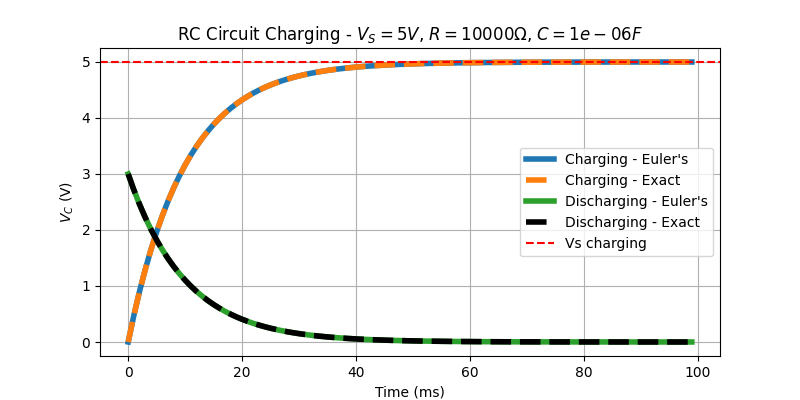

In [ ]:
# clear the plot
plt.close()
px = 1/plt.rcParams['figure.dpi']  # pixel in inches
fig, ax = plt.subplots(figsize=(800*px, 400*px))
ax.plot(t, Vc_euler_charging,    label='Charging - Euler\'s',    linestyle='solid', linewidth=400*px)
ax.plot(t, Vc_exact_charging,    label='Charging - Exact',       linestyle='dashed', linewidth=400*px)
ax.plot(t, Vc_euler_discharging, label='Discharging - Euler\'s', linestyle='solid', linewidth=400*px)
ax.plot(t, Vc_exact_discharging, label='Discharging - Exact',    linestyle='dashed', linewidth=400*px, color='black')
# plot a line at Vs
ax.axhline(y=Vs, color='r', linestyle='--', label='Vs charging')
ax.set_xlabel('Time (ms)')
ax.set_ylabel(r'$V_C$ (V)')
ax.set_title(fr'RC Circuit Charging - $V_S={Vs} V$, $R={R} \Omega$, $C={C} F$')
ax.legend()
plt.grid()
plt.show()


---

>**Assignment 12**
>
> What can you say about the results given by Euler's method compared to the results from the exact solution?

<font color='red'> **Solution**:</font>

They are very similar. The Euler's method is therefore a good approximation for the charging and discharging of the RC circuit.

---

To get a <ins>better understanding</ins> of the charging and discharging of the RC circuit, you can use the **interactive plot** below. Modify the values of $V_S$, $R$, $C$ and observe, how the charing curve changes. Then, solve the **Assignments** below the **interactive plot**.

**If the plot is not working for you, use the interactive plot from 2.3**.

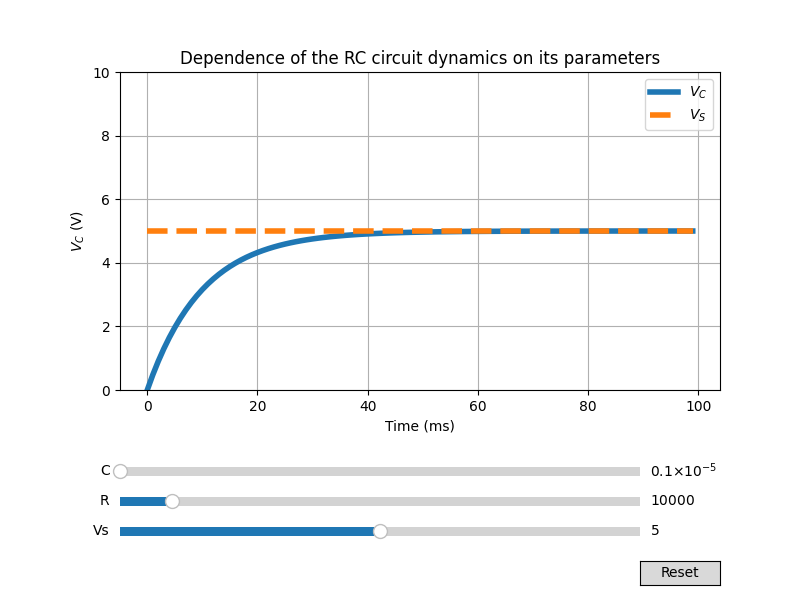

In [ ]:
from utils_ex1.utils import plot_vc_slider
plt.close()
Vs_default = 5
R_default = 10000
C_default = 0.000001
V0_default = 0
plot_vc_slider(Vs_default, R_default, C_default, V0_default)

---

>**Assignment 13**
>
> What happens to the capacitor saturating voltage if you increase the voltage source $V_S$ (while keeping resistance $R$ and capacitance $C$ constant)?

<font color='red'> **Solution**:</font>

The capacitor saturating voltage also increases.



>**Assignment 14**
>
> What happens to the capacitor charging curve if you increase the resistance $R$ (while keeping capacitance $C$ and voltage source $V_S$ constant)?

<font color='red'> **Solution**:</font>

The capacitor voltage takes more time to reach saturation.



>**Assignment 15**
>
> What happens if you increase the capacitance $C$ (while keeping the resistance $R$ and the voltage source $V_S$ constant)?

<font color='red'> **Solution**:</font>

The capacitor voltage takes more time to reach saturation.



>**Assignment 16**
>
> Reset the plot by clicking the "Reset" button. Then, double the value for the capacitance and take a screenshot. Next, reset the plot, double the resistance value and take another screenshot. Compare both screenshots. What do you observe? Why?

<font color='red'> **Solution**:</font>

The plots are identical. The quantity $R \cdot C$, which determines the dynamic, is the same for both cases.

---

## 2.3: The time constant $\tau$ (tau) <a name="tau"></a>

In neurons, the **time constant $\tau$** refers to the <ins>time it takes</ins> for the membrane potential to either <ins>charge or discharge to approximately 63% of its final value</ins> after a change in input (such as the introduction of a current).

It is given by $\tau = RC$ and gives you an idea of how fast the capacitor charges or discharges.

<ins>Clarifying the relationship between the time constant and the previous exercise:</ins>

When you look at the discretized equation for our RC circuit above:

$V_C(t + \Delta t) = e^{-\frac{\Delta t}{R * C}} * V_C(t) + (1 - e^{-\frac{\Delta t}{R * C}}) * V$,

you can see that the term $\frac{1}{R * C}$ appears twice.


Taking the analytical solution for charging a capacitor:

$V_C(t) = V * (1 - e^{-t / (RC)})$,

you can see that the voltage across the capacitor at time $t = \tau = RC$ is equal to $V_C(t=\tau) = V * (1 - e^{-1}) = 0.63 * V$.

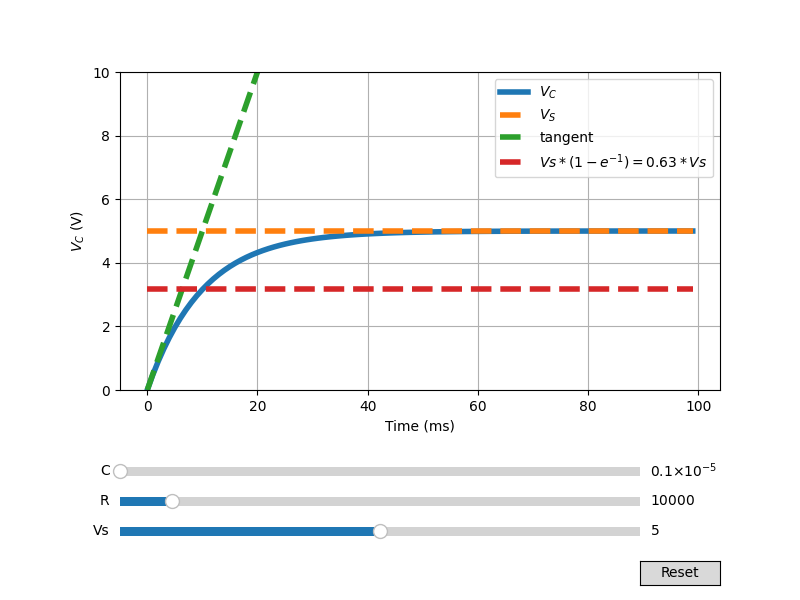

In [ ]:
from utils_ex1.utils import plot_vc_tc_slider
plt.close()
plot_vc_tc_slider()

The model above now shows a horizontal line (red) at 63% of the maximum Voltage $V_S$, represented by the horizontal orange line. In addition, we plot a tangent line (green) to the charing curve $V_C$ at $t=0$.

---

>**Assignment 17**
>
> Varying $R$ and $C$, how is the insersect between the tangent line and $V_S$ related to the intersect between $V_C$ and $0.63*V_S$?

<font color='red'> **Solution**:</font>

Both intersections occur at the same time $ t = R \cdot C$.



>**Assignment 18**
>
> On the cell above change the value of `plot_vertical_tc` to `True` and run the cell. What do you observe? Does it correspond to your previous answer?

<font color='red'> **Solution**:</font>

Both intersections occur at the same time $ t = R \cdot C$.

---

# End of this exercise session